# Tarea 1 - EYP3407
### Profesor: Mauricio Castro
### Por: Javiera Valenzuela Soto y Francisca Vilca Sánchez

## 1) Entropía
Sea $Z$ una variable aleatoria con función de densidad dada por

$$f(z |\mu ,\sigma^2,\alpha) = \frac{2}{\sigma}\phi(\frac{z − \mu}{\sigma})\Phi(\alpha(\frac{z − \mu}{\sigma})),z \in \mathbb{R},$$

donde $\phi(·)$ y $\Phi(·)$ representan la función de densidad y la función distribución, respectivamente, de una variable aleatoria normal estándar. La notación utilizada para referirnos a la distribución de $Z$ seŕa $Z ∼ SN(\mu,\sigma^2,\alpha)$. Note que cuando $\alpha = 0, Z ∼ N(\mu,\sigma^2)$. Muestre
que la entropía $H_{SN}(\mu,\sigma^2,\alpha)$ de $Z$, está dada por 

$$H_{SN}(\mu,\sigma^2,\alpha) = H_{N}(\mu,\sigma^2) − E(X_0) [ln (2\Phi(\alpha X_0))] ,$$

donde $X_0 ∼ SN(\alpha)$ y $H_{N(\mu,\sigma^2)}$ es la entropía cuando $Z ∼ N(\mu,\sigma^2)$. Grafique la entropía $H_{SN}(\mu=0,\sigma^2=1,\alpha)$ para diferentes una grilla de valores de α entre $−20$ y $20$. ¿Qué puede concluir de lo anterior?

## Solución:

BLABLABLABLA

## 2) Sistemas de Recomendación a usar

#### (a) Descripción y objetivo del problema

¿Porque elegimos la base y q queremos hacer con ella, mencionar los 2 tipos de métodos a usar y pq creeemos q funcionarían

#### Análisis Exploratorio de los datos

In [3]:
# Librerías a usar
import pandas as pd

data = pd.read_csv("anime.csv")
display(data.head())
print("Dimensiones:", data.shape)


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


Dimensiones: (12294, 7)


,type
type,
Movie,2348
Music,488
ONA,659
OVA,3311
Special,1676
TV,3787


<Axes: xlabel='type'>

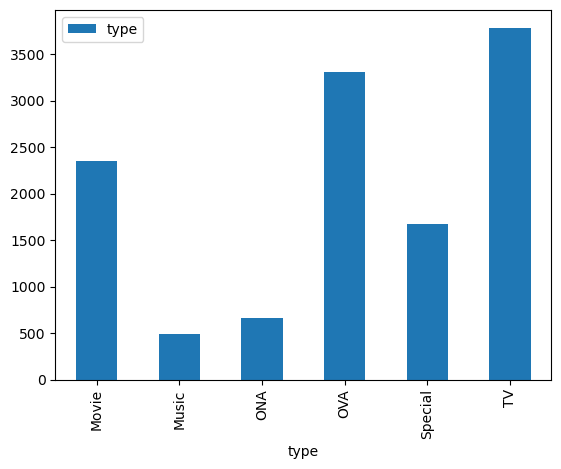

In [4]:
data_barplot = data.groupby(["type"]).agg({"type": "count"})
display(data_barplot)
data_barplot.plot(kind="bar")

In [6]:

data_ratings = data.groupby(["rating"]).agg({"rating": "count"})
display(data_ratings)
data_ratings.plot(kind="pie")

,rating
rating,
1.67,1
1.92,1
2.00,1
2.14,1
2.37,1
...,...
9.33,1
9.37,1
9.50,1


ValueError: pie requires either y column or 'subplots=True'

: 

#### (c) Descripción del método utilizado

#### (d) Implementación computacional

#### (e) Resultados obtenidos

#### (f) Medida de performance

### Preguntas a Contestar:

#### (a) ¿Cuál es en su opinión el mejor sistema de recomendación? Discutir
#### (b) ¿Los métodos considerados son escalables? Comente